# Machine Learning Real Estate Project

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [158]:
df=pd.read_csv("data.csv")
df.head()

,no,date,age,dist_mrt,n_stores,lat,lon,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [159]:
print (df.columns)

Index(['no', 'date', 'age', 'dist_mrt', 'n_stores', 'lat', 'lon', 'price'], dtype='object')


In [160]:
data= df.iloc[:,1:-1]
data.head()

,date,age,dist_mrt,n_stores,lat,lon
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245


In [161]:
price = df["price"]
price.shape

(414,)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
...     data, price, test_size=0.30, random_state=42)
y_train.shape
print(X_train)

            date   age    dist_mrt  n_stores       lat        lon
7    2013.416667  20.3   287.60250         6  24.98042  121.54228
194  2013.500000  15.2  3771.89500         0  24.93363  121.51158
19   2012.666667   1.5    23.38284         7  24.96772  121.54102
176  2012.833333  13.9  4573.77900         0  24.94867  121.49507
367  2012.833333  15.0  1828.31900         2  24.96464  121.51531
304  2013.416667  20.0  1626.08300         3  24.96622  121.51668
198  2013.083333  34.0   157.60520         7  24.96628  121.54196
145  2012.916667   2.1   451.24380         5  24.97563  121.54694
265  2012.833333  15.7   815.93140         4  24.97886  121.53464
109  2013.583333   4.0  2147.37600         3  24.96299  121.51284
202  2012.916667  38.3   642.69850         3  24.97559  121.53713
196  2013.000000  22.8   707.90670         2  24.98100  121.54713
396  2012.666667  37.1   918.63570         1  24.97198  121.55063
239  2013.500000  18.1   837.72330         0  24.96334  121.54767
83   2012.

In [163]:
regression = DecisionTreeRegressor()
meany=np.mean(y_train)
print(meany)
print((np.mean((meany-y_test.values)**2))**0.5)

38.44186851211073
13.021642241849854


In [164]:
regression.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
predictions=regression.predict(X_test)
print(predictions)
print(y_test.values)
print((np.mean((predictions-y_test.values)**2))**0.5) #root mean squared error, farklarin karelerinin ortalamasinin koku = standard deviation gibi birsey

[48.6  38.9  43.5  29.3  27.7  36.5  42.1  51.7  12.8  58.1  29.4  33.4
 48.   13.8  39.6  23.   41.4  55.2  21.8  40.6  14.4  20.9  43.5  36.3
 11.6  33.1  12.8  43.1  60.7  35.3  25.3  21.7  42.5  26.6  41.2  39.7
 52.7  15.9  36.5  60.7  36.5  44.2  39.7  26.5  39.3  47.9  42.5  23.8
 47.7  39.7  48.6  55.   42.3  37.4  37.4  15.9  38.1  22.8  27.7  51.7
 25.7  21.4  15.9  13.2  15.   20.9  20.8  44.2  38.4  25.3  29.3  61.5
 51.8  36.9  31.5  26.5  46.4  26.9  40.2  31.1  46.4  42.1  20.8  67.7
 25.6  27.7  38.1  41.6  28.8  34.   20.5  37.5  43.5  45.9  40.6  32.4
 23.1  41.4  25.7  53.9  25.6  30.9  40.6  23.8  56.15 53.5  23.5  17.7
 37.4  46.4  36.2  29.3  43.2  41.6  22.   55.2  51.7  39.7  25.3  30.1
 39.6  29.3  69.7  54.4  37.8 ]
[45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59.  30.6 30.7 35.6 13.7
 62.9 30.5 41.9 54.4 29.5 43.7 12.2 22.1 49.5 47.4 18.6 28.5 14.7 45.4
 41.  35.1 22.1 28.9 30.5 26.5 49.3 37.  56.3 15.4 48.5 63.3 50.5 42.2
 37.9 37.5 40.5 57.4 26.5 21.8 49.7

In [166]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh2 = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train.iloc[:,:-2], y_train)   #Fit k-nn regressor using features other than latitude longtitude
neigh2.fit(X_train.iloc[:,-2:], y_train)  #Fit k-nn regressor using latitude longtitude

predictions1=neigh.predict(X_test.iloc[:,:-2])
predictions2=neigh2.predict(X_test.iloc[:,-2:])
predictions=(predictions1+predictions2)/2        #take average of the predictions
print(predictions)
print(y_test.values)
print((np.mean((predictions-y_test.values)**2))**0.5) #root mean squared error calculation
#take differences of the expected and the predicted values, square them, add them up, divide by the total number of examples, take square root
#farklarin karelerinin ortalamasinin koku = standard deviation gibi birsey

print((np.mean((predictions1-y_test.values)**2))**0.5) #root mean squared error of the first k-nn model
print((np.mean((predictions2-y_test.values)**2))**0.5) #root mean squared error of the second k-nn model





neigh3 = KNeighborsRegressor(n_neighbors=1)
neigh3.fit(X_train, y_train)   #Fit k-nn regressor using features other than latitude longtitude
predictions3=neigh3.predict(X_test)
print((np.mean((predictions3-y_test.values)**2))**0.5) #root mean squared error calculation


[48.96  39.155 45.45  38.4   26.845 37.54  45.98  50.78  22.585 56.38
 23.74  30.695 27.64  19.985 38.34  24.745 44.785 50.115 27.645 37.785
 15.85  23.34  48.355 46.825 17.59  40.3   21.97  45.45  48.64  44.705
 17.125 23.51  41.13  26.29  50.01  38.255 53.68  16.27  41.58  39.1
 41.965 40.825 46.705 40.375 40.955 53.05  35.365 20.945 48.92  46.705
 48.96  53.27  40.755 43.84  40.69  16.27  37.63  30.47  26.845 50.78
 28.295 28.785 16.27  18.025 16.365 23.34  26.29  36.875 42.52  25.64
 40.735 40.55  50.115 50.64  41.885 44.85  47.8   45.315 41.51  29.925
 38.34  45.98  27.19  47.805 26.32  28.295 39.205 39.265 28.895 38.215
 23.525 41.885 36.925 46.81  40.335 37.585 25.175 40.195 27.845 50.26
 24.59  43.455 34.015 24.635 49.615 54.08  24.11  21.235 41.885 47.8
 40.5   38.4   46.93  48.    23.095 49.035 50.78  43.38  26.27  28.04
 42.555 23.525 63.485 51.86  39.935]
[45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59.  30.6 30.7 35.6 13.7
 62.9 30.5 41.9 54.4 29.5 43.7 12.2 22.1 49.5 47.

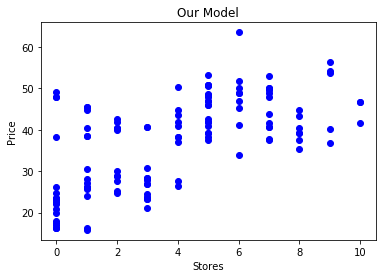

In [167]:
stores=X_test["n_stores"].values
plt.scatter(stores,predictions,color= "blue")
plt.xlabel("Stores")
plt.ylabel("Price")
plt.title("Our Model")
plt.show()

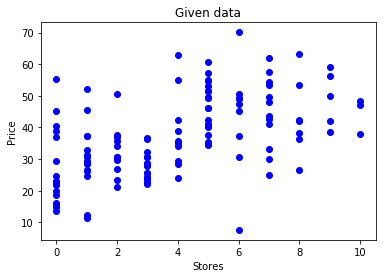

In [168]:
stores=X_test["n_stores"].values
plt.scatter(stores,y_test,color= "blue")
plt.xlabel("Stores")
plt.ylabel("Price")
plt.title("Given data")
plt.show()

In [169]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [170]:
houses = pd.read_csv("data.csv")

In [171]:
houses.head()

,no,date,age,dist_mrt,n_stores,lat,lon,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [172]:
houses_train, houses_test = train_test_split(houses, test_size = 0.3)

In [173]:
houses_train.shape

(289, 8)

In [174]:
houses_test.shape

(125, 8)

In [175]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(houses_train.iloc[:,:-1], houses_train.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [176]:
train_pred = regr.predict(houses_train.iloc[:,:-1])

In [177]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.11829979e-02  4.33201691e+00 -2.51464923e-01 -3.50472478e-03
  1.20984836e+00  2.37855732e+02  3.82649330e+01]


In [178]:
print('Variance score: %.2f' % (r2_score(train_pred, houses_train.iloc[:,-1])))

Variance score: 0.46


In [179]:
test_pred = regr.predict(houses_test.iloc[:,:-1])
print('Variance score: %.2f' % (r2_score(test_pred, houses_test.iloc[:,-1])))

Variance score: -0.42





# USING STATSMODEL




In [180]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS


In [198]:
features = ['date', 'age', 'dist_mrt', 'n_stores', 'lat', 'lon']

houses_train_X = houses_train.loc[:,features]
houses_train_y = houses_train.loc[:, 'price']

houses_test_X = houses_test.loc[:,features]
houses_test_y = houses_test.loc[:, 'price']

houses_train_X = sm.add_constant(houses_train_X)
houses_test_X = sm.add_constant(houses_test_X)

In [182]:
model = sm.OLS(houses_train_y, houses_train_X)
results = model.fit()

In [183]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     82.72
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.82e-59
Time:                        22:56:27   Log-Likelihood:                -1003.5
No. Observations:                 289   AIC:                             2021.
Df Residuals:                     282   BIC:                             2047.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.02e+04   7284.511     -2.773      0.0

In [184]:
#houses_train_X

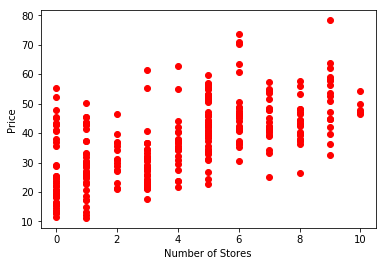

In [185]:
plt.plot(houses_train_X.n_stores, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Number of Stores')
plt.show()

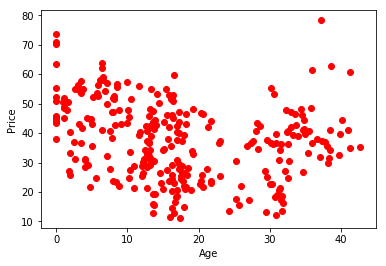

In [186]:
plt.plot(houses_train_X.age, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Age')
plt.show()

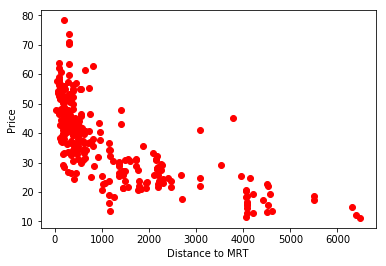

In [187]:
plt.plot(houses_train_X.dist_mrt, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Distance to MRT')
plt.show()

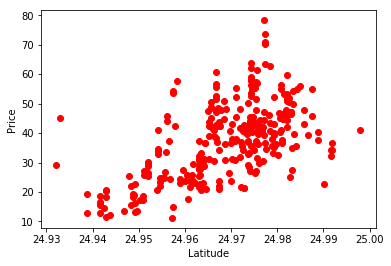

In [188]:
plt.plot(houses_train_X.lat, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Latitude')
plt.show()

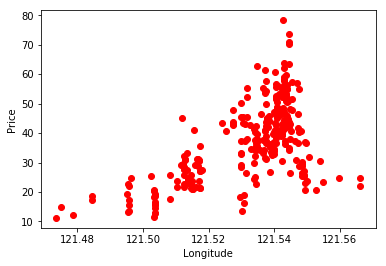

In [189]:
plt.plot(houses_train_X.lon, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Longitude')
plt.show()

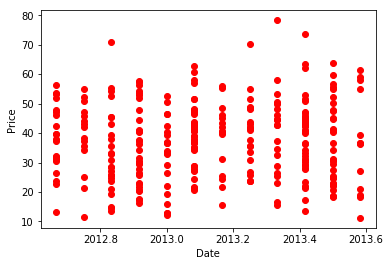

In [190]:
plt.plot(houses_train_X.date, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [191]:
print("Average price")
houses_train_y.mean()

Average price


37.49411764705882

In [192]:
train_pred = results.predict(houses_train_X)
# Use the model on test data
test_pred = results.predict(houses_test_X)

In [193]:
print("Training R2", r2_score(houses_train_y, train_pred) )
print("Test R2", r2_score(houses_test_y, test_pred) )

Training R2 0.6376879915551443
Test R2 0.47445405909564586


In [197]:
# Remove Longitude

features2 = ['date', 'age', 'dist_mrt', 'n_stores', 'lat']

houses_train_X2 = houses_train.loc[:,features2]
houses_train_y2 = houses_train.loc[:, 'price']

houses_test_X2 = houses_test.loc[:,features2]
houses_test_y2 = houses_test.loc[:, 'price']

houses_train_X2 = sm.add_constant(houses_train_X2)
houses_test_X2 = sm.add_constant(houses_test_X2)

In [195]:
model2 = sm.OLS(houses_train_y2, houses_train_X2)
results2 = model2.fit()

In [196]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     99.26
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.71e-60
Time:                        22:56:32   Log-Likelihood:                -1003.8
No. Observations:                 289   AIC:                             2020.
Df Residuals:                     283   BIC:                             2042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.509e+04   3601.182     -4.191      0.0

In [149]:
train_pred2 = results2.predict(houses_train_X2)
# Use the model on test data
test_pred2 = results2.predict(houses_test_X2)

In [150]:
print("Training R2 - second model", r2_score(houses_train_y, train_pred2) )
print("Test R2 - second model", r2_score(houses_test_y, test_pred2) )

Training R2 - second model 0.6243712235178585
Test R2 - second model 0.48890902818228876


In [151]:
# Statsmodels examples